In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as style
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
from sklearn.metrics import confusion_matrix

In [3]:
main_df = pd.read_csv("creditcard.csv", )
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


In [4]:
main_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
main_df.isnull().values.any()

np.False_

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
main_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.111019
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.314156
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Feature Engineering: Extract hour of transaction
main_df['Hour'] = (main_df['Time'] // 3600) % 24

# Scaling the 'Amount' feature
scaler = StandardScaler()
main_df['Amount_Scaled'] = scaler.fit_transform(main_df[['Amount']])

# Feature Selection: Select top 10 features based on mutual information
X = main_df.drop(columns=['Class', 'Time', 'Amount'])  # Drop non-relevant or redundant columns
y = main_df['Class']

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['V2', 'V9', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'Hour',
       'Amount_Scaled'],
      dtype='object')


In [9]:
main_df.drop('Time', axis=1, inplace=True)

In [10]:
X = main_df.drop('Class', axis=1)
y = main_df['Class']
X.shape, y.shape

((284807, 31), (284807,))

In [11]:
temp_df = main_df.copy()

In [12]:
main_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0.0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0.0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0.0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0.0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0.0,-0.073403


In [13]:
class_count_df = pd.DataFrame(main_df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal', 1:'Fraud'}, inplace=True)
class_count_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_15384\2257056053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_count_df['Class'].replace({0:'Normal', 1:'Fraud'}, inplace=True)


,Class,Counts
0,Normal,253188
1,Fraud,31619


C:\Users\hp\AppData\Local\Temp\ipykernel_15384\2403090806.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
C:\Users\hp\AppData\Local\Temp\ipykernel_15384\2403090806.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


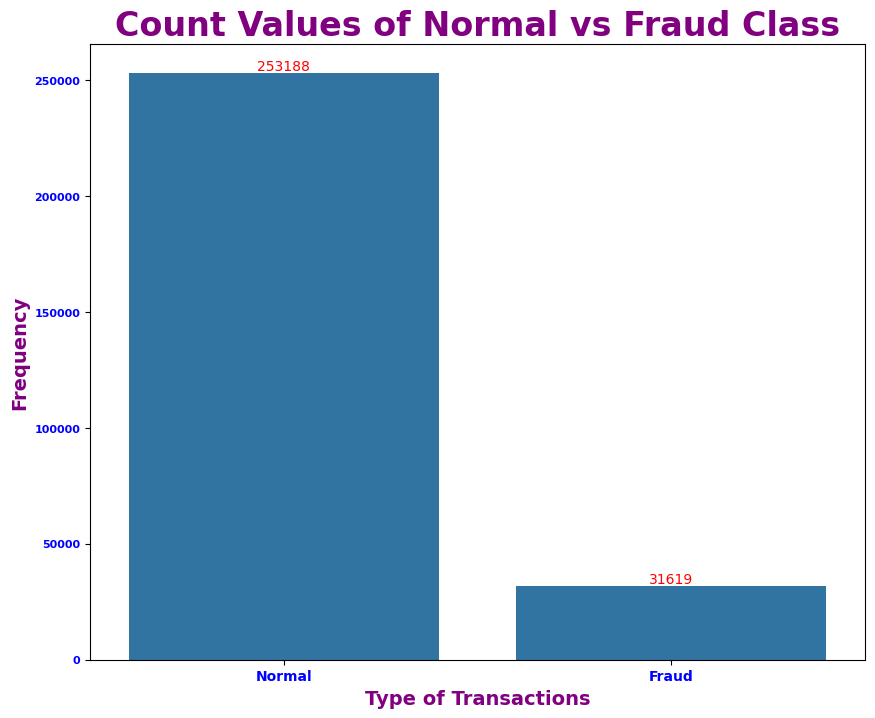

In [14]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')
warnings.filterwarnings("ignore")

In [15]:
fraud = main_df[main_df['Class'] == 1]
normal = main_df[main_df['Class'] == 0]
fraud.shape, normal.shape

((31619, 32), (253188, 32))

In [16]:
fraud_frc = len(fraud)/float(len(main_df))
fraud_frc

0.11101904096458304

In [17]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 11.10%


In [18]:
fraud.Amount.describe()

count    31619.000000
mean        75.939117
std        257.876123
min          0.000000
25%          4.065000
50%         17.990000
75%         64.975000
max      25691.160000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()

count    253188.000000
mean         89.899486
std         249.091647
min           0.000000
25%           5.990000
50%          22.730000
75%          79.000000
max       19656.530000
Name: Amount, dtype: float64

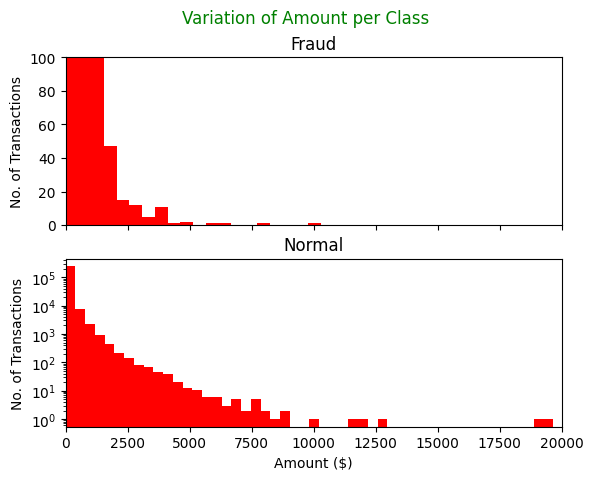

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1,sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Step 3: Define and train the models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [24]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [25]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [26]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

In [27]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [28]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
warnings.filterwarnings("ignore")

In [29]:
# Step 4: Evaluate each model
models = {
    "Decision Tree": y_pred_dt,
    "K-Nearest Neighbors": y_pred_knn,
    "Logistic Regression": y_pred_lr,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
}

for model_name, y_pred in models.items():
    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", (accuracy_score(y_test, y_pred)*100),"%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*60)

Model: Decision Tree
Confusion Matrix:
 [[72445  3512]
 [ 3355  6131]]
Accuracy: 91.9630630946947 %
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     75957
           1       0.64      0.65      0.64      9486

    accuracy                           0.92     85443
   macro avg       0.80      0.80      0.80     85443
weighted avg       0.92      0.92      0.92     85443

Model: K-Nearest Neighbors
Confusion Matrix:
 [[74827  1130]
 [ 6989  2497]]
Accuracy: 90.49775873974463 %
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     75957
           1       0.69      0.26      0.38      9486

    accuracy                           0.90     85443
   macro avg       0.80      0.62      0.66     85443
weighted avg       0.89      0.90      0.89     85443

Model: Logistic Regression
Confusion Matrix:
 [[75939    18]
 [ 9376   110]]
Accuracy: 89.0

In [30]:
# Function to plot the confusion matrix
def Plot_confusion_matrix(y_test, y_pred, model_name):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Define category names
    categoryNames = ['Non-Fraudulent', 'Fraudulent']
    
    # Plot the confusion matrix
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add x and y ticks
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    
    # Labels for each cell in the confusion matrix
    s = [['TN', 'FP'], ['FN', 'TP']]
    
    # Annotate the matrix with values and labels
    for i in range(2):
        for j in range(2):
            plt.text(j, i, s[i][j] + " = " + str(cm[i][j]), fontsize=12, ha='center')
    
    # Show the plot
    plt.show()

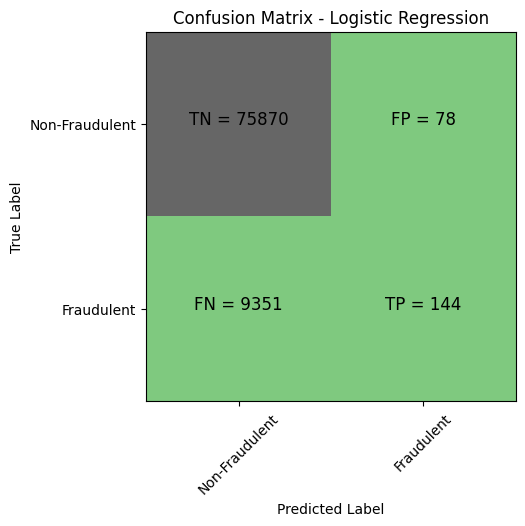

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_test = log_reg.predict(X_test)

# Plot confusion matrix
Plot_confusion_matrix(y_test, pred_test, "Logistic Regression")

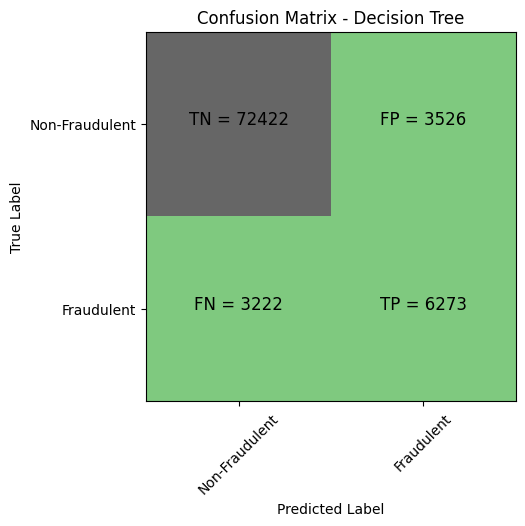

In [32]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_test = dt.predict(X_test)

# Plot confusion matrix
Plot_confusion_matrix(y_test, pred_test, "Decision Tree")

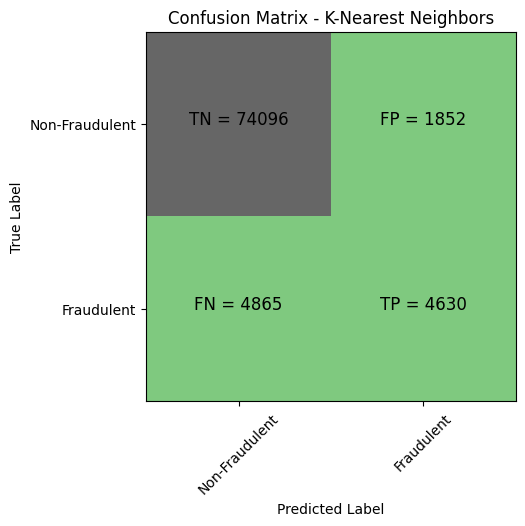

In [33]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_test = knn.predict(X_test)

# Plot confusion matrix
Plot_confusion_matrix(y_test, pred_test, "K-Nearest Neighbors")

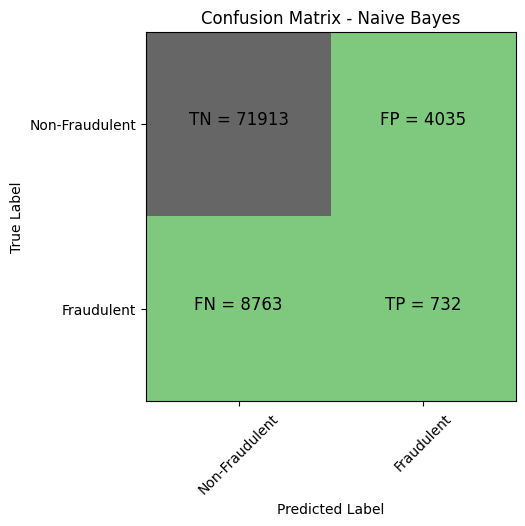

In [34]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_test = nb.predict(X_test)

# Plot confusion matrix
Plot_confusion_matrix(y_test, pred_test, "Naive Bayes")

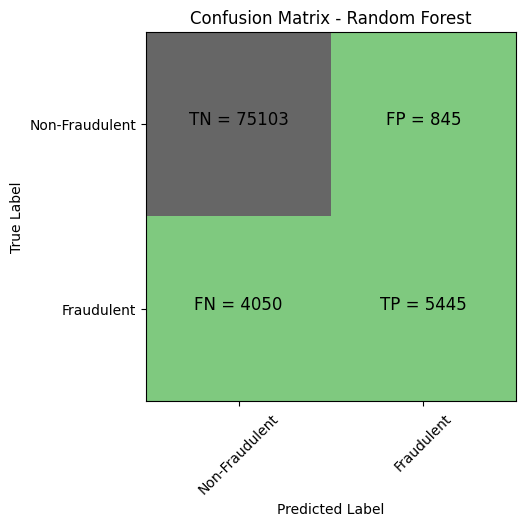

In [35]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_test = rf.predict(X_test)

# Plot confusion matrix
Plot_confusion_matrix(y_test, pred_test, "Random Forest")

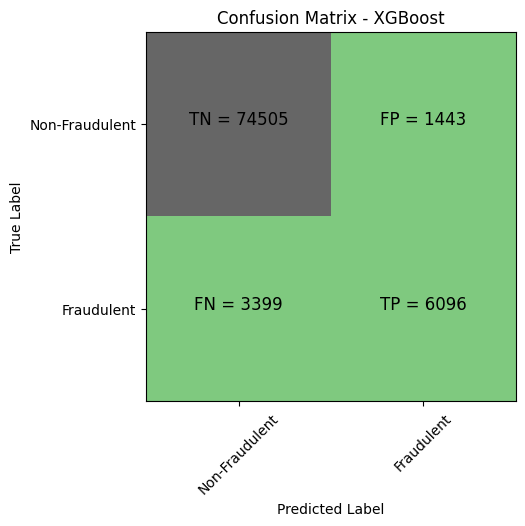

In [36]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from xgboost import XGBClassifier

# XGBoost model
xgb = XGBClassifier(eval_metric="logloss")
xgb.fit(X_train, y_train)
pred_test = xgb.predict(X_test)

# Plot confusion matrix
Plot_confusion_matrix(y_test, pred_test, "XGBoost")

Accuracy for Logistic Regression: 88.96%
Accuracy for Decision Tree: 92.02%
Accuracy for K-Nearest Neighbors: 92.14%
Accuracy for Naive Bayes: 85.02%
Accuracy for Random Forest: 94.22%
Accuracy for XGBoost: 94.33%


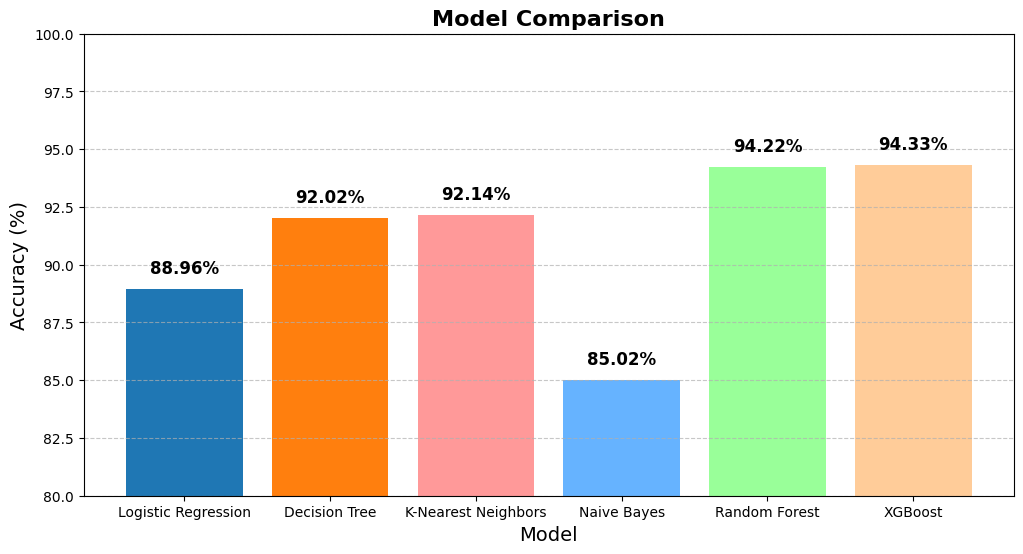

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined
best_results = {}

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Fit models and calculate accuracies
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store the accuracy score in percentages
    accuracy = accuracy_score(y_test, y_pred) * 100
    best_results[model_name] = accuracy
    print(f"Accuracy for {model_name}: {accuracy:.2f}%")

# Visualization
colors = ['#1f77b4', '#ff7f0e', '#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

plt.figure(figsize=(12, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)

# Add title and labels
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(80, 100)

# Annotate the bars with accuracy values in percentages
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%',ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
